### Первичная работа с данными

In [1]:
# импорты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [3]:
# посмотрим на наши данные
print("data shape:", data.shape)
data.head()

data shape: (52584, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [4]:
# статистическая информация
data.describe()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,24700.000000,34039.000000,25189.000000,52571.000000,52571.000000,52556.000000,52571.000000,52572.000000,48575.000000,48575.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,57.395992,52.910544,57.678987,11.295372,69.545646,1016.017564,17.471115,49.602367,0.142001,0.935362
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,47.616179,42.576138,48.412620,9.877649,17.658942,9.016829,9.315528,78.283572,1.065094,6.586855
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-21.000000,11.320000,990.000000,-5.000000,0.000000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,26.000000,26.000000,26.000000,3.000000,57.930000,1008.100000,10.000000,6.000000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,44.000000,41.000000,43.000000,12.000000,72.420000,1016.000000,18.000000,20.000000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,73.000000,67.000000,73.000000,20.000000,83.370000,1023.000000,25.000000,61.000000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,635.000000,730.000000,636.000000,28.000000,100.000000,1040.000000,41.000000,1110.000000,61.600000,226.400000


In [5]:
# сводная таблица
# в PM много пропусков
# всего одна категориальная фича
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  int64  
 2   month          52584 non-null  int64  
 3   day            52584 non-null  int64  
 4   hour           52584 non-null  int64  
 5   season         52584 non-null  int64  
 6   PM_Jingan      24700 non-null  float64
 7   PM_US Post     34039 non-null  float64
 8   PM_Xuhui       25189 non-null  float64
 9   DEWP           52571 non-null  float64
 10  HUMI           52571 non-null  float64
 11  PRES           52556 non-null  float64
 12  TEMP           52571 non-null  float64
 13  cbwd           52572 non-null  object 
 14  Iws            52572 non-null  float64
 15  precipitation  48575 non-null  float64
 16  Iprec          48575 non-null  float64
dtypes: float64(10), int64(6), object(1)
memory usage: 

In [6]:
# у нас есть одна категориальная фича — направление ветра
data['cbwd'].value_counts(dropna=False)

NE     19497
SE     15073
NW      9569
SW      6108
cv      2325
NaN       12
Name: cbwd, dtype: int64

In [7]:
# применим one-hot encoding к направлению ветра
# drop_first=True, так как информация о первой категории
# и так будет во всех остальных (если все 0, то первая категория)
data_dum = pd.get_dummies(data, drop_first=True)
print("shape of data after OHE:", data_dum.shape)
data_dum.head()

shape of data after OHE: (52584, 20)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,1.0,0.0,0.0,0,0,0,1
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,2.0,0.0,0.0,0,1,0,0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,4.0,0.0,0.0,0,1,0,0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,5.0,0.0,0.0,0,1,0,0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,8.0,0.0,0.0,0,1,0,0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

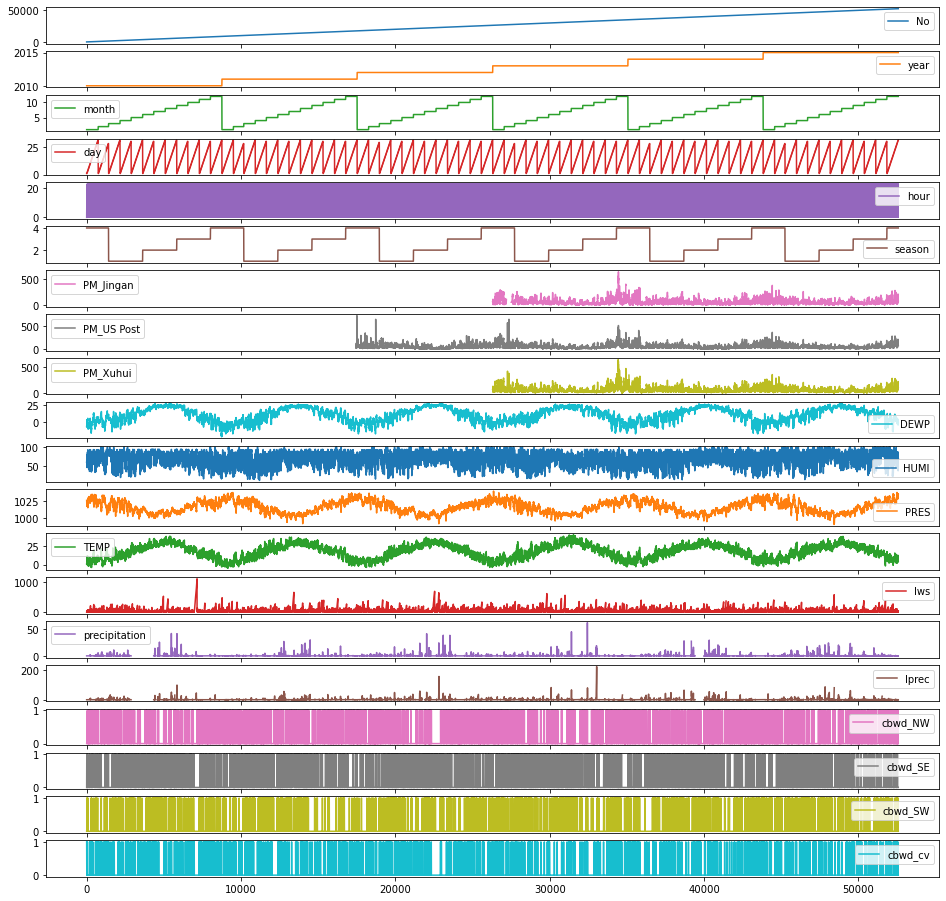

In [8]:
# графики по отдельности
# 1) практически везде виден периодичный характер изменений
# 2) давление, влажность, температура и точка росы имеют схожую зависимость,
#    сезонные колебания
# 3) PM и еще 3 фичи: осадки, по часам и суммарные, и скорость ветра больше похожи
#    на константы с выбросами;
#    для PM выбросы более вероятны там, где давление больше, для 3 других фичей
#    наоборот. Также явно прослеживается корреляция выбросов и направления ветра
data_dum.plot(figsize=(16, 16), subplots=True)

In [9]:
# по PM нет данных за первую половину наблюдений,
# но практически вся информация в таблице имеет периодичный харакетер,
# поэтому при простом удалении сэмплов с NaN ничего страшного
# произойти не должно, так как все зависимости из данных все равно удастся
# получить, ведь они повторяются, а диапазон второй половины наблюдений
# покрывает достаточный промежуток времени, чтобы описать все характерные
# изменения фичей и таргета

data_no_na = data_dum.dropna()
print("shape of data without NaNs:", data_no_na.shape)
data_no_na.head()

shape of data without NaNs: (21436, 20)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
26304,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,60.0,0.0,0.0,0,0,1,0
26305,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,62.0,0.0,0.0,0,0,1,0
26307,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,65.0,0.0,0.0,0,0,1,0
26308,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,68.0,0.0,0.0,0,0,1,0
26309,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,70.0,0.0,0.0,0,0,1,0


In [10]:
# отнормируем наши данные, так как:
# 1) статистические методы лучше работают с нормализованными данными
# 2) чисел с плавающей точкой рядом с нулем больше, поэтому численная устойчивость выше
# 3) в нашем случае линейной модели добавляется интерпретируемость величины весов
#    как меры значимости соответствующих признаков

from sklearn import preprocessing

# вычитание минимума из каждого признака, а затем деление на
# разницу максимального и минимального значения
normalizer = preprocessing.MinMaxScaler()

# data_norm = (data_no_na - data_no_na.mean()) / data_no_na.std()
data_norm = normalizer.fit_transform(data_no_na)
data_norm_df = pd.DataFrame(data=data_norm, columns=data_no_na.columns)
print("current shape of data:", data_norm_df.shape)
data_norm_df.head()

current shape of data: (21436, 20)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.107261,0.134503,0.110236,0.266667,0.643309,0.66,0.068182,0.098684,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000038,0.0,0.0,0.0,0.043478,1.0,0.108911,0.146199,0.111811,0.266667,0.643309,0.66,0.068182,0.101974,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000114,0.0,0.0,0.0,0.130435,1.0,0.118812,0.150097,0.114961,0.288889,0.705557,0.66,0.068182,0.106908,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000152,0.0,0.0,0.0,0.173913,1.0,0.122112,0.148148,0.119685,0.288889,0.770337,0.66,0.045455,0.111842,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000190,0.0,0.0,0.0,0.217391,1.0,0.118812,0.150097,0.124409,0.288889,0.770337,0.66,0.045455,0.115132,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
data_norm_df.describe()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
count,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,0.490317,0.490040,0.492074,0.493516,0.513403,0.489706,0.094001,0.103576,0.090664,0.626534,0.639537,0.521198,0.468591,0.079402,0.002161,0.003849,0.188375,0.291472,0.120452,0.031956
std,0.280594,0.405762,0.315879,0.294366,0.292605,0.378562,0.079436,0.084361,0.077520,0.211181,0.208266,0.179125,0.204154,0.111346,0.016724,0.030013,0.391020,0.454451,0.325496,0.175886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249819,0.000000,0.181818,0.233333,0.260870,0.000000,0.041254,0.050682,0.039370,0.444444,0.498101,0.360000,0.295455,0.009868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.477985,0.500000,0.454545,0.500000,0.521739,0.333333,0.070957,0.079922,0.067717,0.644444,0.662524,0.520000,0.477273,0.032895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.728718,1.000000,0.727273,0.733333,0.782609,0.666667,0.118812,0.128655,0.114961,0.822222,0.804510,0.660000,0.636364,0.101974,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


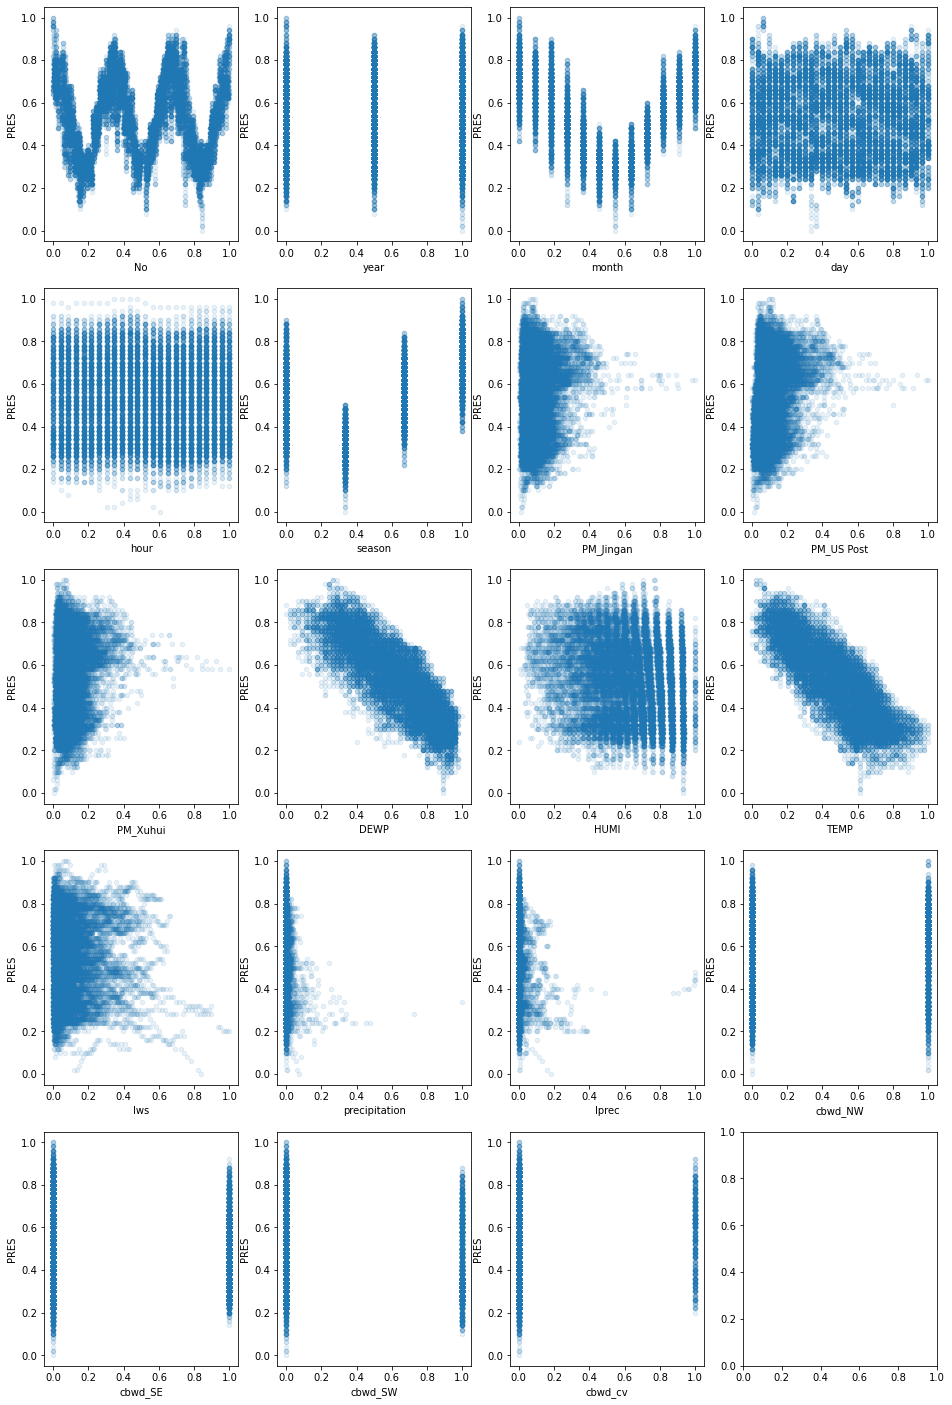

In [12]:
# визуализируем зависимость таргета от фичей по отдельности
fig, axs = plt.subplots(
    nrows=5, ncols=4, figsize=(16, 25)
)

list_col_names = list(data_norm_df.columns)
list_col_names.remove('PRES')

for i, ax in enumerate(axs.flatten()):
    if i == len(list_col_names):
        break
    data_norm_df.plot.scatter(x=list_col_names[i], y='PRES', alpha=0.1, ax=ax)

<AxesSubplot:>

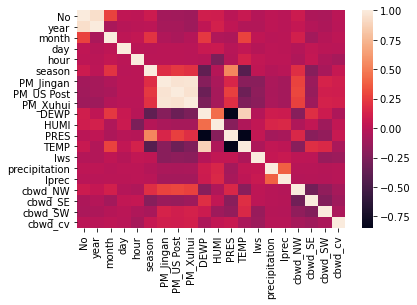

In [13]:
# корреляционная матрица в дополнение ко всему, что сказано выше
# опять видна ярко выраженная корреляция между разными PM
# и сильная зависимость давления от температуры и точки росы и этих величин друг от друга
sns.heatmap(data_norm_df.corr(method="pearson"))

Как было показано, давление имеет сезонный характер изменений. Добавим в данные тригонометрические функции от месяца и сезона

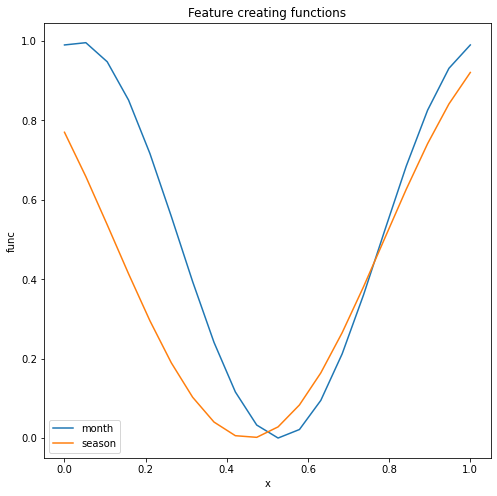

In [14]:
x = np.linspace(0, 1, 20)
month_func = lambda x: 0.5 * np.cos(2*np.pi*x - 0.2) + 0.5
season_func = lambda x: 0.5 * np.cos(1.5*np.pi*x + 1.0) + 0.5

plt.figure(figsize=(8, 8))
plt.plot(x, month_func(x), label='month')
plt.plot(x, season_func(x), label='season')
plt.title("Feature creating functions")
plt.xlabel("x")
plt.ylabel("func")
plt.legend()
plt.show()

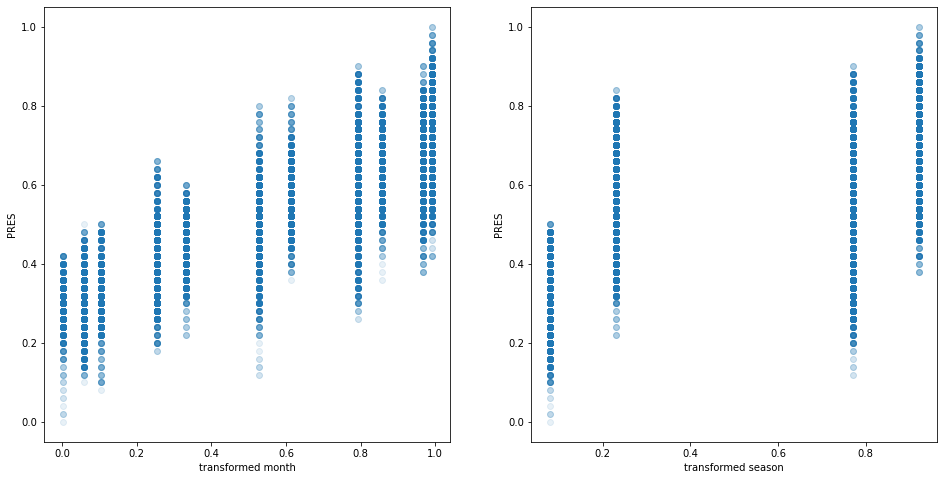

In [15]:
new_month_feature = month_func(data_norm_df["month"])
new_season_feature = season_func(data_norm_df["season"])

fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 8)
)
axs[0].scatter(new_month_feature, data_norm_df["PRES"],
               alpha=0.1)
axs[0].set_xlabel("transformed month")

axs[1].scatter(new_season_feature, data_norm_df["PRES"],
               alpha=0.1)
axs[1].set_xlabel("transformed season")

axs[0].set_ylabel("PRES")
axs[1].set_ylabel("PRES")
plt.show()

Теперь это что-то более линейное. Добавим новые фичи в наши данные

In [16]:
data_norm_df["transformed_month"] = new_month_feature
data_norm_df["transformed_season"] = new_season_feature
print("current shape of data:", data_norm_df.shape)
data_norm_df.head()

current shape of data: (21436, 22)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,...,TEMP,Iws,precipitation,Iprec,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,transformed_month,transformed_season
0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.107261,0.134503,0.110236,0.266667,...,0.068182,0.098684,0.0,0.0,0.0,0.0,1.0,0.0,0.990033,0.920735
1,0.000038,0.0,0.0,0.0,0.043478,1.0,0.108911,0.146199,0.111811,0.266667,...,0.068182,0.101974,0.0,0.0,0.0,0.0,1.0,0.0,0.990033,0.920735
2,0.000114,0.0,0.0,0.0,0.130435,1.0,0.118812,0.150097,0.114961,0.288889,...,0.068182,0.106908,0.0,0.0,0.0,0.0,1.0,0.0,0.990033,0.920735
3,0.000152,0.0,0.0,0.0,0.173913,1.0,0.122112,0.148148,0.119685,0.288889,...,0.045455,0.111842,0.0,0.0,0.0,0.0,1.0,0.0,0.990033,0.920735
4,0.000190,0.0,0.0,0.0,0.217391,1.0,0.118812,0.150097,0.124409,0.288889,...,0.045455,0.115132,0.0,0.0,0.0,0.0,1.0,0.0,0.990033,0.920735


<AxesSubplot:>

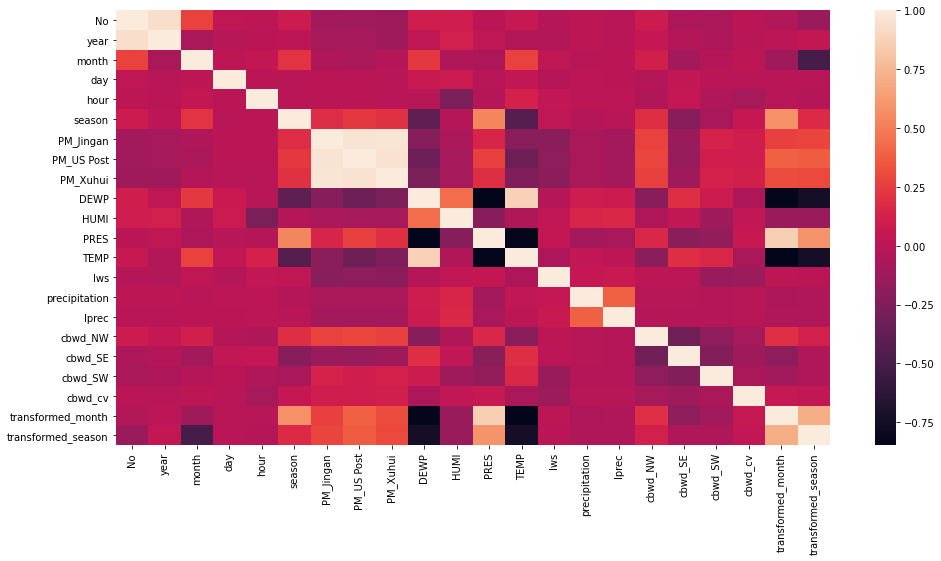

In [17]:
# Добавленные признаки коррелируют с таргетом больше, чем исходные
fig, ax = plt.subplots(figsize=(16, 8)) 
sns.heatmap(data_norm_df.corr(method="pearson"), ax=ax)

### Линейная регрессия

In [18]:
from sklearn.model_selection import train_test_split

# разбиваем данные на тест и трейн
X_train, X_test, y_train, y_test = train_test_split(
    data_norm_df.drop(['PRES'], axis=1),
    data_norm_df['PRES'],
    test_size=0.3
)

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
# я остановил свой выбор на линейной регрессии с l2 регуляризацией
model = Ridge(alpha=0.3)
model.fit(X_train, y_train)

print(f'MSE on train: {mean_squared_error(model.predict(X_train), y_train)}')
print(f'MAE on train: {mean_absolute_error(model.predict(X_train), y_train)}')
print(f'R2 on train: {model.score(X_train, y_train)}')

MSE on train: 0.004799905245165176
MAE on train: 0.054812755401066615
R2 on train: 0.85081004329714


Выполним предсказания на тесте и получим метрики:

In [28]:
predictions = model.predict(X_test)

print(f'MSE on test: {mean_squared_error(predictions, y_test)}')
print(f'MAE on test: {mean_absolute_error(predictions, y_test)}')
print(f'R2 on test: {model.score(X_test, y_test)}')

MSE on test: 0.0049132934031882345
MAE on test: 0.0553346125098172
R2 on test: 0.8458579088163463


P.S. Минимизировали MSE + l2, но ради интереса хочется и на MAE посмотреть.

Наибольший вклад, ожидаемо, вносят величины явно связанные с таргетом физически:
1. температура TEMP
2. влажность HUMI
3. Точка росы DEWP

Добавленные признаки вносят бОльший вклад, чем исходные month и season. Особенно хорошо это видно на примере transformed_month, вес которого в 4-5 раз больше, чем для его основы. Важность season с помощью добавления новой фичи transformed_season также удалось повысить в 2 раза.

Неожиданно большой вклад вносит PM_Xuhui: -0.16

Также можно заметить значительный вклад precipitation — кол-ва осадков в час, и Iprec — общего кол-ва осадков за день. Причем они отрицательные. Вероятно, стоит ожидать, что в дождливые дни в Шанхае давление будет снижаться, что логично, ведь осадки обычно возникают вследствие циклонов, а они являются огромными областями пониженного давления.

In [29]:
print(f'Number of features used to build model: {model.n_features_in_}\n\n')
print("Feature names and corresponding weights:\n")
print(f'bias term\t      {model.intercept_}\n')
print(pd.Series(data=model.coef_, index=model.feature_names_in_))

Number of features used to build model: 21


Feature names and corresponding weights:

bias term	      0.8372755565898777

No                   -0.010106
year                  0.018026
month                 0.045896
day                   0.013263
hour                 -0.009461
season                0.027028
PM_Jingan             0.034293
PM_US Post           -0.005192
PM_Xuhui             -0.160953
DEWP                  0.243065
HUMI                 -0.310732
TEMP                 -0.755008
Iws                  -0.034964
precipitation        -0.161690
Iprec                -0.131803
cbwd_NW              -0.037536
cbwd_SE              -0.020258
cbwd_SW              -0.039488
cbwd_cv              -0.019919
transformed_month     0.194880
transformed_season   -0.058021
dtype: float64
